# Introduction

Hello there! There is no question that Soccer is the most popular sport in the world, and also one of the most lucrative. Their transfer market moves the media and the investors globally, and estimating correctly the value of each player before their transfer is a valuable asset from fans to professionals. This is the **goal** of this Jupyter Notebook: given the data from the transfer markets from 2017 to 2020 (available
in https://www.kaggle.com/kriegsmaschine/soccer-players-values-and-their-statistics), I will try to predict using Machine Learning models the value of the soccer athletes. Let's start! 

# Reading Data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3)

In [68]:
df_1718 = pd.read_csv('Data/transfermarkt_fbref_201718.csv', delimiter=';', index_col=0)
df_1819 = pd.read_csv('Data/transfermarkt_fbref_201819.csv', delimiter=';', index_col=0)
df_1920 = pd.read_csv('Data/transfermarkt_fbref_201920.csv', delimiter=';', index_col=0)

C:\Users\ubfil\anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (395) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [69]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [70]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [71]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

In [72]:
df.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
379.0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2530.0,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#,2017
721.0,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2512.0,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2017
882.0,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7108 entries, 379.0 to 2615.0
Columns: 400 entries, player to year
dtypes: float64(390), int64(1), object(9)
memory usage: 21.7+ MB


In [74]:
df.index = range(len(df))

### Creating Test Set

In [75]:
df = df.dropna(subset=['value'])
df.index = range(len(df))

Given that new data will always be the upcoming year, I used StratifiedShuffleSplit to have a well distributed train and test set by year.

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['year']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [77]:
df_train = train_set.copy()

# Data Visualization

### Categorical Data

In [78]:
df_cat = train_set.select_dtypes(include=['object'])
df_cat.drop(columns=['Attendance','Season'], axis=1, inplace=True)

C:\Users\ubfil\anaconda3\envs\env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
df_num = train_set.select_dtypes(exclude=['object'])

In [80]:
train_set.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,year
count,5580.000000,5580.000000,5.580000e+03,5579.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,...,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5258.000000,5580.000000
mean,25.341577,1991.291039,1.023091e+07,181.976878,19.035663,14.967384,1342.801613,1.861828,1.283513,0.174731,...,50.129032,1.372072,48.354785,48.428172,-0.072151,-0.000602,0.184588,0.010215,0.000380,2018.059140
std,4.448123,46.405457,1.660618e+07,9.799587,11.224125,11.243162,975.770576,3.464786,2.073980,0.751963,...,17.259463,0.460014,12.724821,10.403205,19.168608,0.524226,0.387998,0.100561,0.019501,0.833998
min,0.000000,0.000000,5.000000e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,13.000000,0.420000,26.800000,22.700000,-41.500000,-1.090000,0.000000,0.000000,0.000000,2017.000000
25%,22.000000,1989.000000,1.500000e+06,178.000000,9.000000,4.000000,450.000000,0.000000,0.000000,0.000000,...,39.000000,1.060000,39.600000,41.500000,-13.300000,-0.360000,0.000000,0.000000,0.000000,2017.000000
50%,25.000000,1993.000000,4.000000e+06,183.000000,20.000000,14.000000,1238.000000,0.000000,0.000000,0.000000,...,48.000000,1.290000,45.900000,48.400000,-2.900000,-0.080000,0.000000,0.000000,0.000000,2018.000000
75%,28.000000,1996.000000,1.200000e+07,187.000000,29.000000,24.000000,2136.000000,2.000000,2.000000,0.000000,...,59.000000,1.620000,54.700000,55.300000,10.100000,0.290000,0.000000,0.000000,0.000000,2019.000000
max,41.000000,2003.000000,2.000000e+08,203.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,...,100.000000,2.630000,93.000000,84.100000,58.300000,1.780000,1.000000,1.000000,1.000000,2019.000000


In [81]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

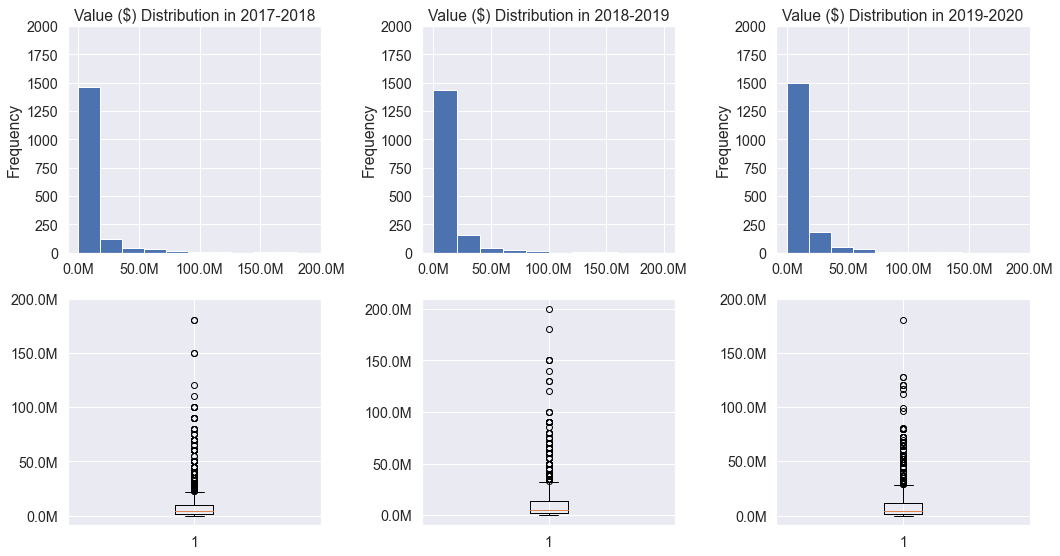

In [82]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))

for i, yr in enumerate([2017, 2018, 2019]):
    df_yr = train_set[train_set['year'] == yr].dropna()
    

    ax[0,i].hist(df_yr.value)
    ax[0,i].set_title('Value ($) Distribution in %i-%i' % (yr, yr+1))
    ax[0,i].set_xticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
    ax[0,i].set_ylabel('Frequency')
    ax[0,i].set_yticks(np.arange(0, 2250, 250))
    ax[0,i].xaxis.set_major_formatter(formatter)
    
    ax[1,i].boxplot(df_yr.value)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].set_yticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
        
    
plt.tight_layout()



In [83]:
def format_nationality(x):
    return str(x)[-3:]

train_set['nationality'] = train_set["nationality"].map(format_nationality)

In [84]:
nation_count = pd.DataFrame(train_set.nationality.value_counts())

In [85]:
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))

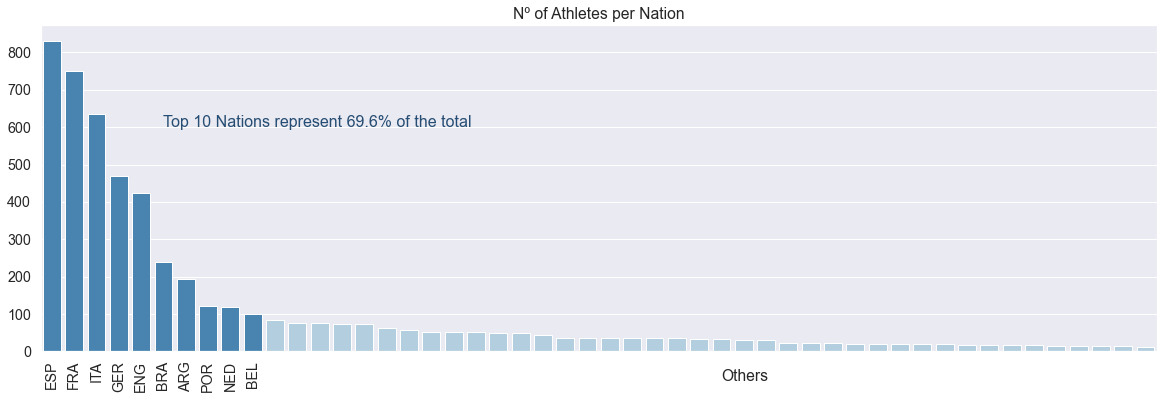

In [86]:
import matplotlib.patches as patches

g = sns.barplot(x="country", y="nationality", hue="hue", dodge=False,
                hue_order=[10,0],
                data=nation_count[:50],
                palette="Blues_r",
                )

g.set_title("Nº of Athletes per Nation")
g.set_ylabel('')
g.set_xlabel('')

plt.xticks(rotation=90)

plt.text(5, 600, 'Top 10 Nations represent %.1f%% of the total' % (nation_count.nationality[:10].sum()/nation_count.nationality.sum()*100),
         color='#264d73', fontsize=16)
plt.text(30, -80, "Others")

for ind, label in enumerate(g.get_xticklabels()):
    if ind < 10:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

g.legend_.remove()
plt.show()

As the top 10 nations represent 69.4% of the training data, I will label the other nationalities as `Others`.

In [87]:
important_nations = nation_count.country[:10].tolist()

train_set["nationality"] = train_set.nationality.map(lambda x: x if x in important_nations else "Other")

In [88]:
train_set.position.unique()

array(['DF', 'MF,FW', 'GK', 'MF', 'FW', 'MF,DF', 'FW,MF', 'DF,MF',
       'FW,DF', 'DF,FW', '0', 'GK,MF'], dtype=object)

In [89]:
train_set.position.replace('0', None, inplace=True)
train_set = train_set.dropna(axis=0, subset=['position'])

In [90]:
def format_position_1(x):
    if len(x) > 2:
        return x[:2]
    else:
        return x
    
def format_position_2(y):
    if len(y) > 2:
        return y[3:]
    else:
        return 'None'
    
train_set['position_1'] = train_set.position.map(format_position_1)
train_set['position_2'] = train_set.position.map(format_position_2)
train_set = train_set.drop(columns=['position'], axis=1)

In [91]:
def show_values_on_bars(axs, h_v="v", space=0.4): # function by https://stackoverflow.com/users/7898385/secant-zhang
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_formatted(axs, h_v="v", space=0.4): 
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, formatter(value), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, formatter(value), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

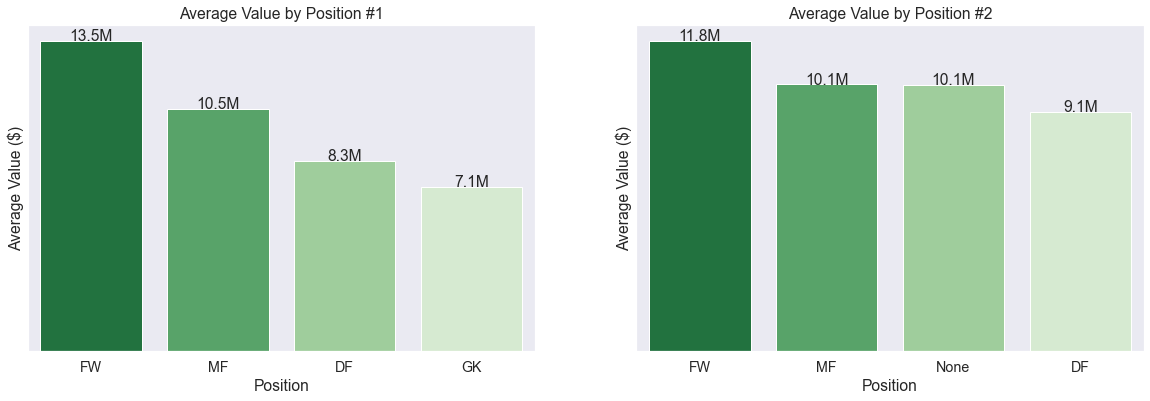

In [92]:
fig, axs = plt.subplots(1,2)

for idx, pos in enumerate(["position_1", "position_2"]):
    by_position = train_set[["value", pos]].groupby(pos).mean().sort_values(by='value', ascending=False)
    
    g = sns.barplot(x=by_position.index, y=by_position.value,
                palette="Greens_r", ax=axs[idx])

    g.set_title("Average Value by Position #" + str(idx+1))
    g.set_ylabel('Average Value ($)')
    g.set_xlabel('Position')

    g.set(yticks=[]) 

    show_values_on_bars_formatted(g, h_v="v")

plt.show()

We can see that is a strong relationship between the 1st position and value, but not so much with the second position.

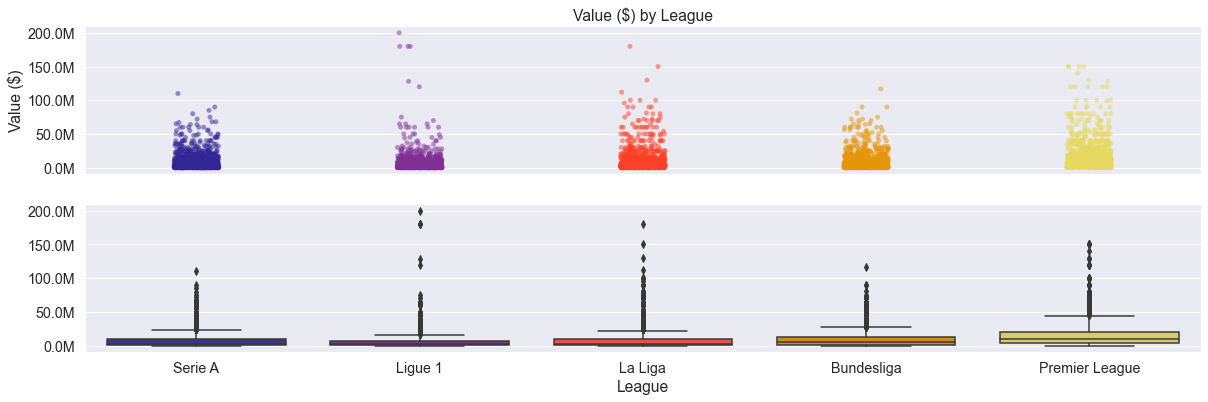

In [93]:
fig, ax = plt.subplots(2,1, sharex=True)

g = sns.stripplot(x="league", y="value", data=train_set, palette="CMRmap",
                ax=ax[0], alpha=0.5, jitter=True,)

ax[0].yaxis.set_major_formatter(formatter)

g.set_title("Value ($) by League")
g.set_ylabel('Value ($)')
g.set_xlabel('')

g = sns.boxplot(x="league", y="value", data=train_set, palette="CMRmap",
                ax=ax[1])

ax[1].yaxis.set_major_formatter(formatter)

g.set_xlabel('League')
g.set_ylabel('')


plt.show()

The values by Leagues is pretty similar (given that our dataset has only the 5 biggest european leagues).

In [94]:
train_set = train_set.dropna(axis=0, subset=['foot'])

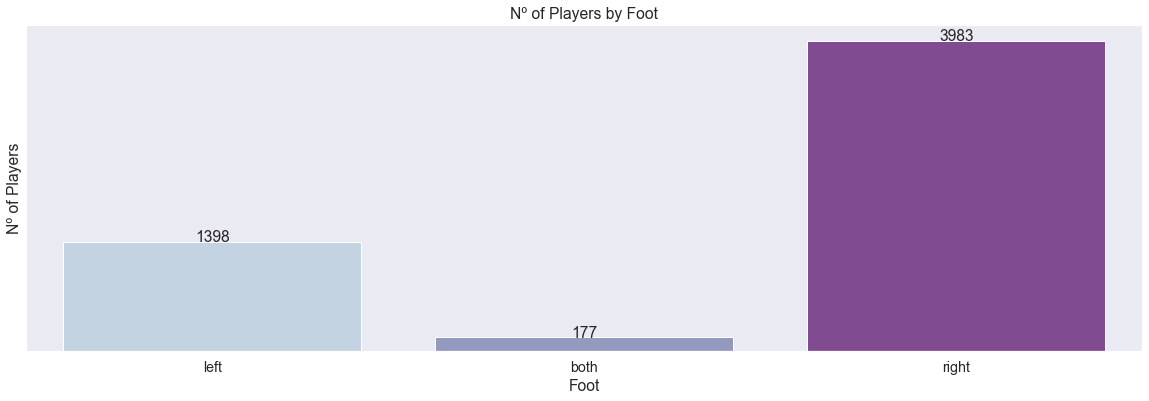

In [95]:
g = sns.countplot(x="foot", data=train_set, palette="BuPu", order=["left", "both", "right"])

g.set_title("Nº of Players by Foot")
g.set_ylabel('Nº of Players')
g.set_xlabel('Foot')
g.set(yticks=[])
show_values_on_bars(g, h_v="v")

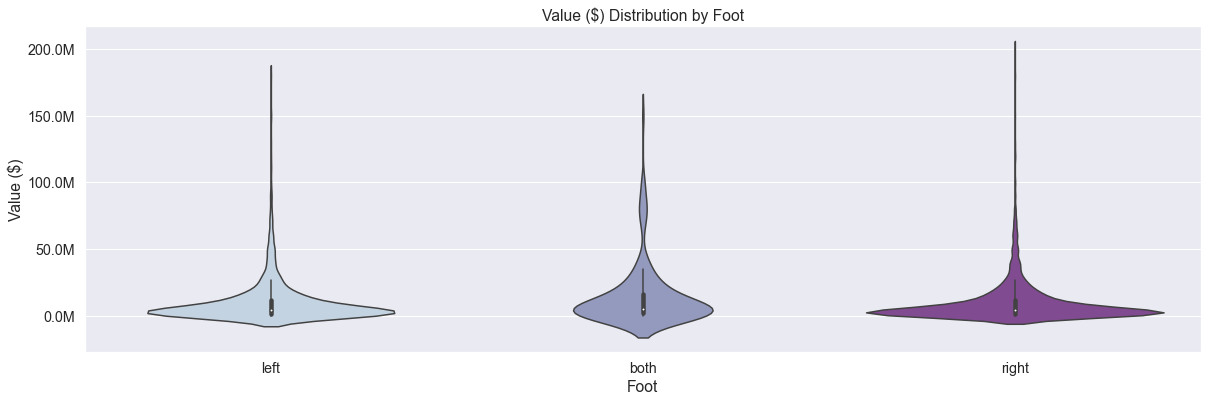

In [96]:
by_foot = train_set[["value", "foot"]].groupby("foot").mean()

fig, ax = plt.subplots(1,1)

g = sns.violinplot(x=train_set.foot, y=train_set.value, palette="BuPu", order=["left", "both", "right"],
                   ax=ax)

g.set_title("Value ($) Distribution by Foot")
g.set_ylabel('Value ($)')
g.set_xlabel('Foot')

ax.yaxis.set_major_formatter(formatter)

plt.show()

In [97]:
def format_Attendance(x):
    x = str(x)
    if ',' in x:
        return round(float(x.replace(',', '')))
    else:
        return round(float(x))

In [98]:
train_set["Attendance"] = train_set.Attendance.map(format_Attendance)

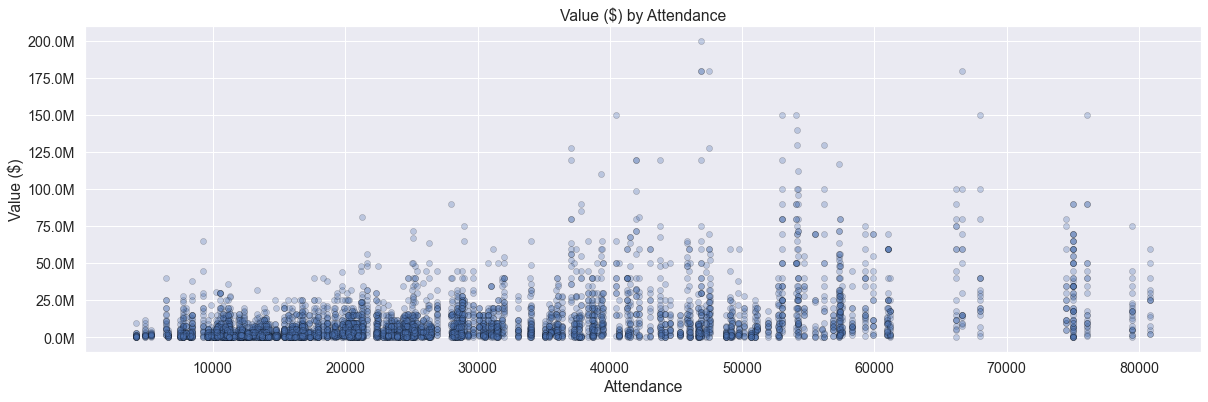

In [99]:
fig, ax = plt.subplots(1,1)

g = sns.scatterplot(x="Attendance", y="value", data=train_set, palette="BuPu", alpha=0.3,
                    x_jitter=True, y_jitter=True, edgecolor="black", ax=ax)

g.set_title("Value ($) by Attendance")
g.set_ylabel('Value ($)')
g.set_xlabel('Attendance')

ax.yaxis.set_major_formatter(formatter)

plt.show()


In [100]:
cat_cols = ["nationality", "position", "foot"]

### Numerical Data

In [101]:
drop = ["aerials_lost", "aerials_won", 'crosses_into_penalty_area', 'crosses_stopped_gk',
        "pressure_regains", "pressures", "saves", ]

train_set = train_set.drop(drop, axis=1)

In [102]:
def correlated(df, threshold, target):
    '''returns the columns of a dataframe whose correlation with the target is above the threshold'''
    corr = pd.Series(abs(df.corr()[target]) > threshold)
    corr_cols = corr.index[corr].tolist()
    corr_cols.remove(target)
    return corr_cols

num_cols_corr = correlated(train_set, 0.3, 'value')

In [103]:
train_set[num_cols_corr].describe()

,games,games_starts,minutes,goals,assists,xg,npxg,xa,minutes_90s,shots_total,...,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL
count,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,...,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,19.088881,15.012415,1346.772760,1.869198,1.288593,1.869072,1.694458,1.250234,14.953401,17.421375,...,50.475891,-0.111551,50.144836,1.372551,48.363764,48.416751,-0.051727,-0.000072,28150.067110,0.185139
std,11.209733,11.238336,975.259317,3.469653,2.076506,3.066607,2.666145,1.732409,10.839382,21.892843,...,13.246505,26.236809,17.271422,0.460212,12.733063,10.405706,19.175846,0.524392,16678.241944,0.388445
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,-54.000000,13.000000,0.420000,26.800000,22.700000,-41.500000,-1.090000,4151.000000,0.000000
25%,9.000000,5.000000,454.000000,0.000000,0.000000,0.100000,0.100000,0.100000,5.000000,2.000000,...,42.000000,-18.000000,39.000000,1.060000,39.600000,41.500000,-13.300000,-0.360000,14685.000000,0.000000
50%,20.000000,14.000000,1245.000000,1.000000,0.000000,0.700000,0.700000,0.600000,13.800000,10.000000,...,50.000000,-4.000000,47.500000,1.290000,45.950000,48.400000,-2.900000,-0.080000,23894.000000,0.000000
75%,29.000000,24.000000,2137.000000,2.000000,2.000000,2.200000,2.100000,1.700000,23.700000,24.000000,...,59.000000,14.000000,59.000000,1.620000,55.000000,55.300000,10.175000,0.290000,38622.000000,0.000000
max,38.000000,38.000000,3420.000000,36.000000,21.000000,29.700000,25.700000,18.400000,38.000000,194.000000,...,85.000000,79.000000,100.000000,2.630000,93.000000,84.100000,58.300000,1.780000,80841.000000,1.000000


In [104]:
train_set[num_cols_corr].isnull().sum().sum()

0

In [105]:
len(num_cols_corr)

74

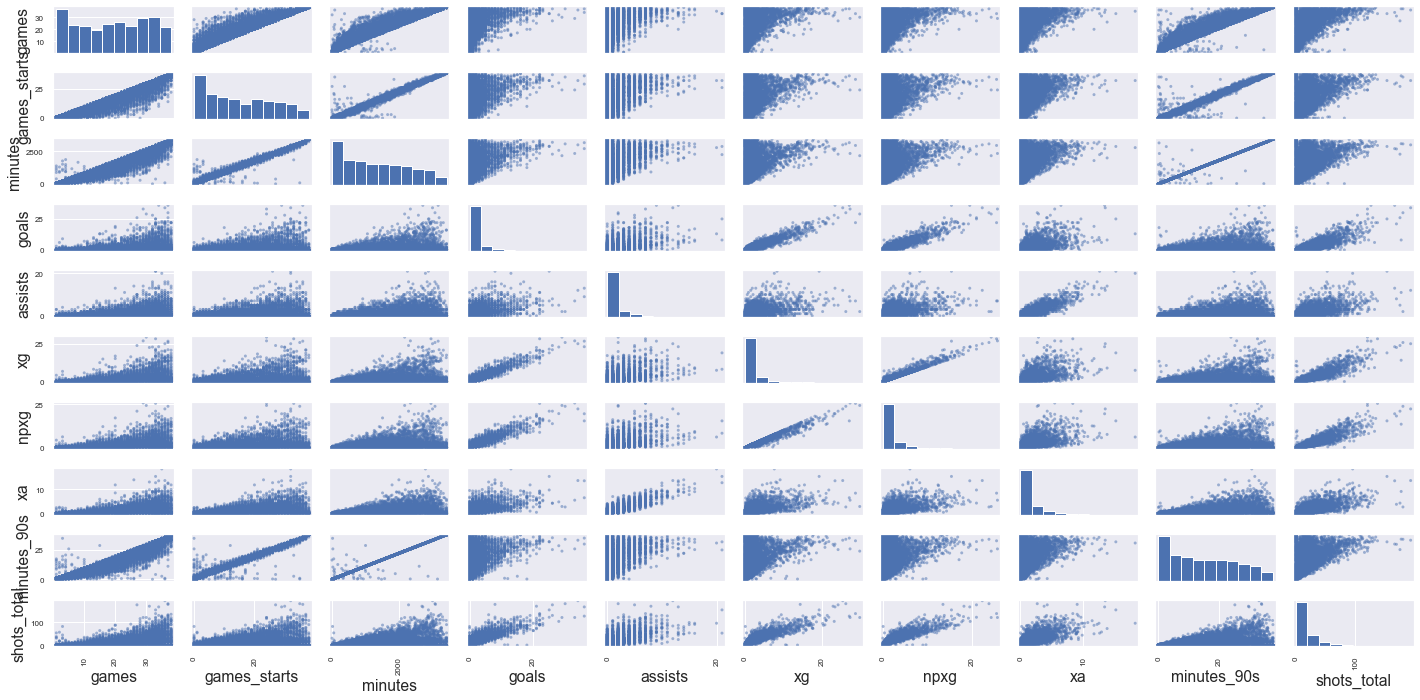

In [106]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set[num_cols_corr[:10]], figsize=(20,10))
plt.tight_layout()
plt.show()

In [107]:
num_cols = train_set.select_dtypes(exclude=["object"]).columns
num_non_corr = list(set(num_cols) - set(num_cols_corr))
train_set[num_non_corr].describe()

,passes_completed_launched_gk,carry_progressive_distancem,assistsm,passes_switchesm,pressures_mid_3rd,cards_yellowm,passes_progressive_distancem,scam,cards_yellow,clearancesm,...,npxg_per90,sca_shotsm,passes_received_pct,passes_oobm,cards_redm,pressures_att_3rdm,goals_assists_per90,passesm,pens_saved,pct_goal_kicks_launched
count,5558.00000,5460.000000,5460.000000,5460.000000,5558.000000,5460.000000,5460.000000,5460.000000,5558.000000,5460.000000,...,5558.000000,5460.000000,5558.000000,5460.000000,5460.000000,5460.000000,5558.000000,5460.000000,5558.000000,5558.000000
mean,8.27222,1.273938,0.000869,0.013997,97.494063,0.002502,3.160632,0.028221,2.755668,0.023995,...,0.121033,0.001518,84.071860,0.009139,0.000119,0.046236,0.196893,0.673305,0.037963,4.981756
std,40.65196,0.873505,0.001411,0.022231,96.463031,0.006437,15.601147,0.200074,2.801713,0.084242,...,0.194885,0.015130,16.073049,0.007195,0.000579,0.235797,0.433921,4.335793,0.267282,18.753019
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.747892,0.000000,0.005692,19.000000,0.000347,1.185676,0.006619,0.000000,0.004205,...,0.020000,0.000000,76.200000,0.005270,0.000000,0.006833,0.000000,0.344164,0.000000,0.000000
50%,0.00000,1.183170,0.000000,0.011364,71.000000,0.001749,2.296432,0.018429,2.000000,0.013309,...,0.060000,0.000336,89.600000,0.008584,0.000000,0.029863,0.100000,0.469827,0.000000,0.000000
75%,0.00000,1.666888,0.001324,0.018808,146.000000,0.003155,3.386107,0.029739,4.000000,0.033116,...,0.160000,0.001419,96.400000,0.012002,0.000000,0.061975,0.290000,0.598821,0.000000,0.000000
max,412.00000,26.000000,0.020000,1.000000,604.000000,0.333333,705.333333,7.272727,17.000000,5.272727,...,4.470000,0.545455,100.000000,0.200000,0.013699,15.500000,22.500000,167.833333,4.000000,100.000000


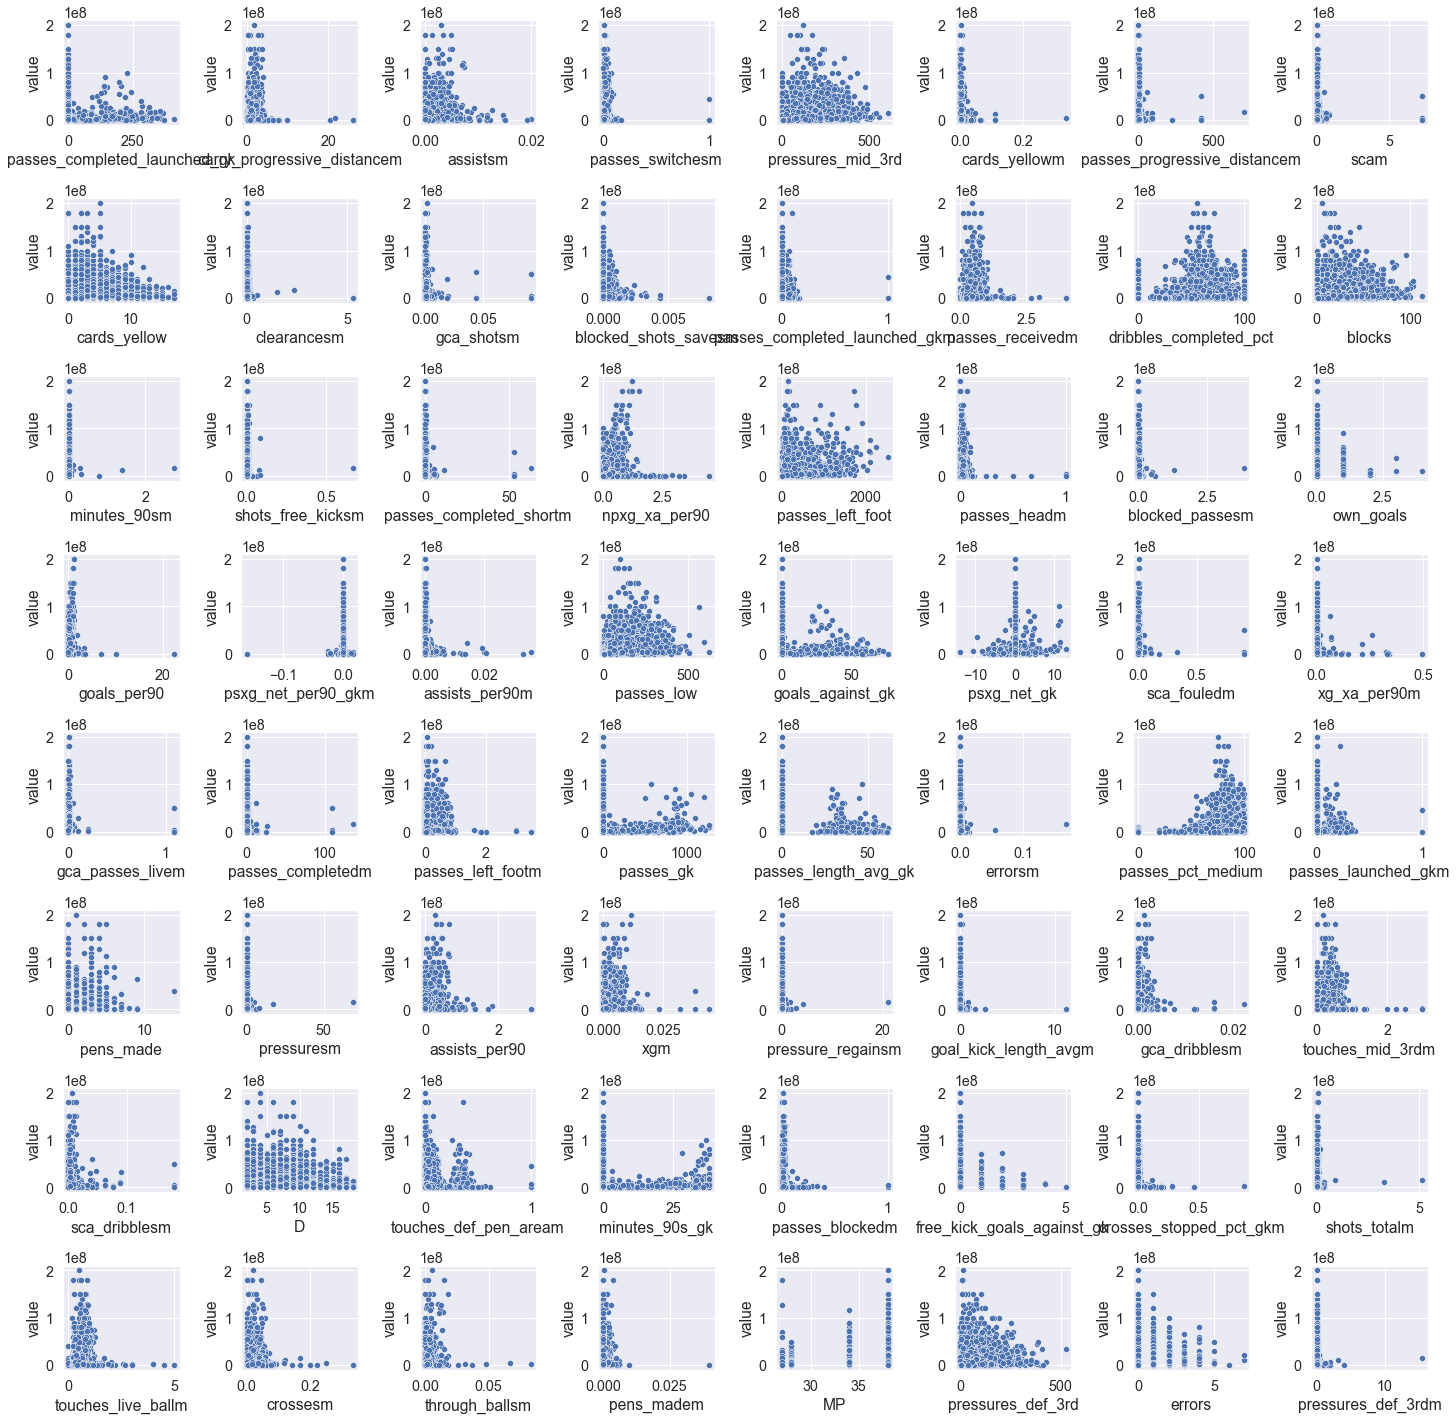

In [108]:
fig, ax = plt.subplots(8,8, figsize=(20,20))

for idx, col in enumerate(num_non_corr[:64]):
    sns.scatterplot(x=train_set[col], y=train_set.value, ax=ax[idx//8, idx%8])
    
plt.tight_layout()
plt.show()

# Data Preparation

In [109]:
cat_cols

['nationality', 'position', 'foot']

In [110]:
num_cols = train_set.select_dtypes(exclude="object").columns.tolist()
num_cols.remove("value")
num_cols.remove("Attendance")

In [111]:
df_train = df_train.drop(drop, axis=1)
X = df_train[num_cols + cat_cols]
y = df_train.value

### Categorical Attributes

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

class Prepare_Categorical_Data(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols):
        self.cat_cols = cat_cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['nationality'] = X["nationality"].map(format_nationality)
        X["nationality"] = X.nationality.map(lambda x: x if x in important_nations else "Other")
        X.position.replace('0', None, inplace=True)
        X['position_1'] = X.position.map(format_position_1)
        return X[cat_cols]

In [113]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat_pipe = Pipeline([
    ('prepare_cat', Prepare_Categorical_Data(cat_cols)),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

### Numerical Attributes

In [114]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

In [115]:
from sklearn.compose import ColumnTransformer

data_prep_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [116]:
X_prep = data_prep_pipe.fit_transform(X)

# Modeling

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import reciprocal, expon
import joblib

In [118]:
def get_model(model_name, params):
    if model_name == "xgb":
        model = xgb.XGBRegressor(**params)
    elif model_name == "lgb":
        model = lgb.LGBMRegressor(**params)
    elif model_name == "svr":
        model = SVR(**params)
    else:
        model = RandomForestRegressor(**params)
    return model

def get_params(model_name):
    if model_name == "xgb":
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.0],
        }
    elif model_name == "lgb":
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.0],
        }
    elif model_name == "svr":
        params = {
            'kernel': ['linear', 'rbf'],
            'C': reciprocal(20, 200000),
            'gamma': expon(scale=1.0),
        }
    else:
        params = {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [3, 5, 7],
        }   
    return params
        

In [121]:
for model_name in ["xgb", "lgb", "svr", "rf"]:
    params = get_params(model_name)
    model = get_model(model_name, params)
    search = RandomizedSearchCV(model, params, cv=5, n_iter=10, 
                                scoring="neg_mean_squared_error",
                                random_state=42)
    search.fit(X_prep, y)
    best_score = np.sqrt(-search.best_score_)
    print("Best parameters for {}: {} with the score {:.2f}".format(model_name, search.best_params_, best_score))
    
    best_model = get_model(model_name, search.best_params_)

    # save the model to disk
    joblib.dump(best_model, "Models/%s.pkl" % model_name)

Best parameters for xgb: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} with the score 8760984.67
Best parameters for lgb: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} with the score 8741973.20
Best parameters for svr: {'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'} with the score 13225986.64
Best parameters for rf: {'n_estimators': 400, 'max_depth': 7} with the score 9528099.07


In [122]:
model_name = "xgb"

params = {
            "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
            "max_depth": [3, 5, 7, 9],
            "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.0],
            "subsample": [0.5, 0.7, 0.9, 1.0],
            "colsample_bytree": [0.5, 0.7, 0.9, 1.0],
            "gamma": [0.1, 0.5, 0.7, 1.0],
        }
model = get_model(model_name, params)
search = RandomizedSearchCV(model, params, cv=5, n_iter=50, 
                            scoring="neg_mean_squared_error",
                            random_state=42)
search.fit(X_prep, y)
best_score = np.sqrt(-search.best_score_)
print("Best parameters for {}: {} with the score {:.2f}".format(model_name, search.best_params_, best_score))

best_model = get_model(model_name, search.best_params_)

# save the model to disk
joblib.dump(best_model, "Models/best_%s.pkl" % model_name)

Best parameters for xgb: {'subsample': 1.0, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.7, 'colsample_bytree': 0.7} with the score 8360141.10


['Models/best_xgb.pkl']

In [123]:
pred_and_prep_pipe = Pipeline([
    ("data_prep", data_prep_pipe),
    ("best_model", search)
])

# Evaluating Test Data

In [124]:
from sklearn.metrics import mean_squared_error

y_test = test_set.value
X_test = test_set[num_cols + cat_cols]

test_preds = pred_and_prep_pipe.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE for test evaluation: {:.2f}".format(rmse))

RMSE for test evaluation: 8558264.50
